# Neural network classification demo (Tensorflow)

### Our task will be to design a neural network to classify precipiation type using temperature and dewpoint data from weather stations in Illinois.  How accurate can you make it by changing the network design.

1. Download and read data

Dataset is 5 minute automated surface observing system data from Illinois sites from 2000-2022 containing temperature, dewpoint temperature, and observed precipiation types and amounts.

In [1]:
!wget https://uofi.box.com/shared/static/g5xaekm0hpxbqmoco8hs6r1bnivi9kgz.csv -O illinois_asos.csv

--2022-12-06 02:41:27--  https://uofi.box.com/shared/static/g5xaekm0hpxbqmoco8hs6r1bnivi9kgz.csv
Resolving uofi.box.com (uofi.box.com)... 74.112.186.144
Connecting to uofi.box.com (uofi.box.com)|74.112.186.144|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /public/static/g5xaekm0hpxbqmoco8hs6r1bnivi9kgz.csv [following]
--2022-12-06 02:41:27--  https://uofi.box.com/public/static/g5xaekm0hpxbqmoco8hs6r1bnivi9kgz.csv
Reusing existing connection to uofi.box.com:443.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://uofi.app.box.com/public/static/g5xaekm0hpxbqmoco8hs6r1bnivi9kgz.csv [following]
--2022-12-06 02:41:27--  https://uofi.app.box.com/public/static/g5xaekm0hpxbqmoco8hs6r1bnivi9kgz.csv
Resolving uofi.app.box.com (uofi.app.box.com)... 74.112.186.144
Connecting to uofi.app.box.com (uofi.app.box.com)|74.112.186.144|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://dl2.boxcloud

In [2]:
!pip install metpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


2. Import data

In [3]:
import pandas as pd
import tensorflow as tf
df = pd.read_csv('illinois_asos.csv', delimiter=',')

df

,station,valid,tmpf,dwpf,p01i,wxcodes
0,MDW,2000-01-01 00:53,35.00,29.00,M,M
1,DPA,2000-01-01 00:53,28.04,24.08,M,M
2,PIA,2000-01-01 00:54,26.06,19.04,M,M
3,SPI,2000-01-01 00:54,19.94,15.08,M,M
4,RFD,2000-01-01 00:54,19.94,15.98,M,M
...,...,...,...,...,...,...
3167008,UGN,2022-11-29 23:55,57.90,48.90,0.00,M
3167009,DKB,2022-11-29 23:55,54.50,52.50,0.00,M
3167010,DNV,2022-11-29 23:55,57.70,53.60,0.00,M
3167011,JOT,2022-11-29 23:55,58.60,54.00,0.00,M


3. Create a `precip_flag` and set all non-rain winter precipitation types to class 1, rain class 0

In [4]:
df['ptype_flag'] = -1.0
mask = df['wxcodes'].str.contains('RA')
df.loc[mask, 'ptype_flag'] = 0
mask = df['wxcodes'].str.contains('DZ')
df.loc[mask, 'ptype_flag'] = 0
mask = df['wxcodes'].str.contains('SN')
df.loc[mask, 'ptype_flag'] = 1
mask = df['wxcodes'].str.contains('FZRA')
df.loc[mask, 'ptype_flag'] = 1
mask = df['wxcodes'].str.contains('FZDZ')
df.loc[mask, 'ptype_flag'] = 1

4. Clean up data and make usable in a precip-only dataframe.

In [5]:
df_precip = df[(df['ptype_flag'] >= 0) & (df['tmpf'] != 'M') & (df['dwpf'] != 'M') & (df['tmpf'] >= df['dwpf'])]
df_precip['tmpf']=df_precip['tmpf'].astype('float')
df_precip['dwpf']=df_precip['dwpf'].astype('float')

<ipython-input-5-5c3d3cbcd734>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_precip['tmpf']=df_precip['tmpf'].astype('float')
<ipython-input-5-5c3d3cbcd734>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_precip['dwpf']=df_precip['dwpf'].astype('float')


5. Do a quick look of data.

Populating the interactive namespace from numpy and matplotlib


Text(0.5, 1.0, 'Classification of observed preciptiation type (0=liquid, 1=solid)')

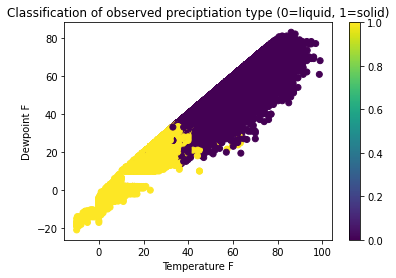

In [6]:
%pylab inline
plt.scatter(df_precip['tmpf'],df_precip['dwpf'],c=df_precip['ptype_flag'])
plt.colorbar()
plt.xlabel('Temperature F')
plt.ylabel('Dewpoint F')
plt.title('Classification of observed preciptiation type (0=liquid, 1=solid)')

In [7]:
import metpy
import metpy.calc
from metpy.units import units

rh = np.array(metpy.calc.relative_humidity_from_dewpoint(df_precip['tmpf'].values * units.degF, df_precip['dwpf'].values * units.degF)) * 100

df_precip['RH'] = rh

<ipython-input-7-628937a3efd2>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_precip['RH'] = rh


6. Create target and feature arrays

In [8]:
target = df_precip.pop('ptype_flag')

In [9]:
numeric_feature_names = ['tmpf', 'dwpf', 'RH']
numeric_features = df_precip[numeric_feature_names].astype('float')
numeric_features.head()

,tmpf,dwpf,RH
206,39.02,32.00,75.688125
212,44.96,35.06,68.047315
221,42.08,35.96,78.739857
236,39.92,37.04,89.337444
242,39.92,32.00,73.079196


7. Start building the tensorflow model. First up, build a normalizer for the features to make them have a mean of 0 and standard deviation of 1.

In [22]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(numeric_features)

In [11]:
normalizer(numeric_features.iloc[:3])

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[-0.42446113, -0.61375636, -1.1840907 ],
       [-0.07779207, -0.437214  , -1.9467393 ],
       [-0.24587393, -0.38528994, -0.87948924]], dtype=float32)>

8. Create the model and compile it in tensorflow/keras.  Note the hyperparameters of the layers, and activation function.  You can add layers, or nodes to each layer.  The normalizer is the first layer, and last layer ('sigmoid') gives the probability of the classification. There are three more hyperparameters, the optimizer (and its learning rate), the loss function, and the metrics. See the tensorflow documentation for what you can change here.

In [17]:
def get_basic_model():
  model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(128, activation='relu'),
#Change or add more/fewer layers here
    #tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu')
  ])
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                loss='binary_crossentropy',
                metrics=['accuracy'])
  return model


9. Let's run.  Here you can change the batch size, the number of epochs, and the validation split.

In [23]:
tf.keras.backend.clear_session()
BATCH_SIZE=1000
model = get_basic_model()
history = model.fit(numeric_features, target, epochs=15,  validation_split=0.3, batch_size=BATCH_SIZE)

Epoch 1/15
171/171 [==============================] - 2s 6ms/step - loss: 1.2606 - accuracy: 0.6727 - val_loss: 1.0612 - val_accuracy: 0.7005
Epoch 2/15
171/171 [==============================] - 1s 5ms/step - loss: 1.5210 - accuracy: 0.7217 - val_loss: 2.0249 - val_accuracy: 0.7453
Epoch 3/15
171/171 [==============================] - 1s 5ms/step - loss: 2.3592 - accuracy: 0.6630 - val_loss: 2.0169 - val_accuracy: 0.7344
Epoch 4/15
171/171 [==============================] - 1s 9ms/step - loss: 2.3446 - accuracy: 0.6560 - val_loss: 2.0162 - val_accuracy: 0.6838
Epoch 5/15
171/171 [==============================] - 1s 5ms/step - loss: 2.3405 - accuracy: 0.6629 - val_loss: 2.0163 - val_accuracy: 0.7255
Epoch 6/15
171/171 [==============================] - 1s 5ms/step - loss: 2.3419 - accuracy: 0.6701 - val_loss: 2.0289 - val_accuracy: 0.7175
Epoch 7/15
171/171 [==============================] - 1s 5ms/step - loss: 2.3466 - accuracy: 0.6609 - val_loss: 2.0166 - val_accuracy: 0.7453
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


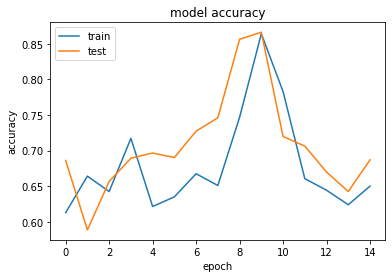

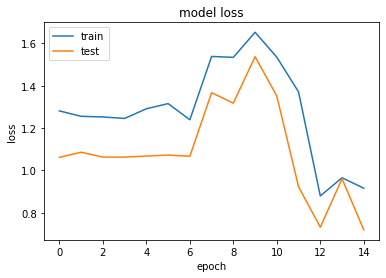

In [16]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

10.  Let's make the model predict an answer!  The answer will be the probability of solid precipitation.

In [25]:
model.predict([32, 32, 95])

1/1 [==============================] - 0s 75ms/step


array([[0.6491281 , 0.        , 0.64320856, 0.        ]], dtype=float32)

10. Now, lets run the model over a domain of values (some are unphysical) and are out of our training domain.  But you can see the observed values and the model probabilities on this plot.

In [27]:
temp_test = np.arange(20,50,0.1)
tdew_test = np.arange(20,50,0.1)

data = np.reshape(np.array(np.meshgrid(temp_test,tdew_test)),[2,300*300]).T

output = model.predict(data)

outgrid = np.reshape(output,[300,300])
fig = plt.figure(figsize=(13,13))
fig.set_facecolor('w')
plt.pcolormesh(temp_test,tdew_test,outgrid, cmap='viridis', vmin=[0,1])
plt.colorbar(label='Probability of Solid Precipitation')
g=plt.scatter(numeric_features['tmpf'],numeric_features['dwpf'], c = target, cmap='jet', vmin=[0,1], s=0.2)
#g.set_facecolor('none')
plt.xlim(20,50)
plt.ylim(20,50)
plt.xlabel('Temperature (degF)')
plt.ylabel('Dewpoint Temperature (degF)')
plt.title('Observations (red-frozen, blue-liquid) and model predicted probabilities (shaded)')

ValueError: ignored

Physically, we would expect frozen precipiation to be observed at higher temperatures above freezing with *lower* humidity due to sublimation.  Can your model capture this?

In [ ]:
#I tried to incorporate relative humidity into my model but unfortunately wasn't able to improve accuracy.  I need to spend more time finetuning the parameters.  
